In [308]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Read the data
df = pd.read_csv('PCA_ready.csv')
df.drop(columns=['Select Printer'], inplace=True)


# Handle missing values in numerical columns using median imputation
numerical_cols = df.columns
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Scale all numerical features
scaler = StandardScaler()
all_features = numerical_cols
df[all_features] = scaler.fit_transform(df[all_features])

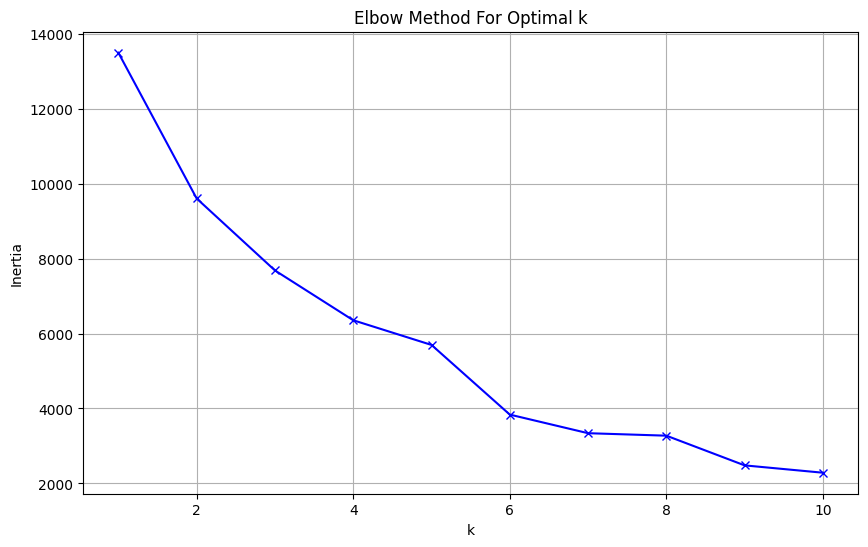

In [309]:
# Calculate inertia for different numbers of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertias = []
K = range(1, 11)  # Testing from 1 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [310]:
import pandas as pd

# Perform K-means clustering
from sklearn.cluster import KMeans
clusters = 7
kmeans = KMeans(n_clusters=clusters)
df['Cluster'] = kmeans.fit_predict(df[all_features])

# Print cluster sizes
print("\nCluster Sizes:")
print(df['Cluster'].value_counts().sort_index())

# Print characteristics of each cluster
print("\nCluster Characteristics:")
for cluster in range(clusters):
    print(f"\nCluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    
    # Print statistics for all features
    print("\nFeature Statistics:")
    print(cluster_data[all_features].describe().round(2))





Cluster Sizes:
Cluster
0     235
1    1030
2      18
3     139
4     288
5     178
6      40
Name: count, dtype: int64

Cluster Characteristics:

Cluster 0:

Feature Statistics:
       Printer Requested  Material 1 Qty  User Type  Material 1  Printed On  \
count             235.00          235.00     235.00      235.00      235.00   
mean                0.10           -0.23      -0.12       -0.39        0.09   
std                 0.58            0.55       0.98        1.20        0.57   
min                -0.31           -0.68      -2.79       -1.67       -0.31   
25%                -0.31           -0.61      -1.13       -1.59       -0.31   
50%                -0.31           -0.40       0.52       -0.98       -0.31   
75%                 0.93           -0.07       0.52        0.42        0.90   
max                 0.93            2.48       0.52        1.64        0.90   

       Print Time (Hours)  Material_Category1  
count              235.00              235.00  
mean         

[]

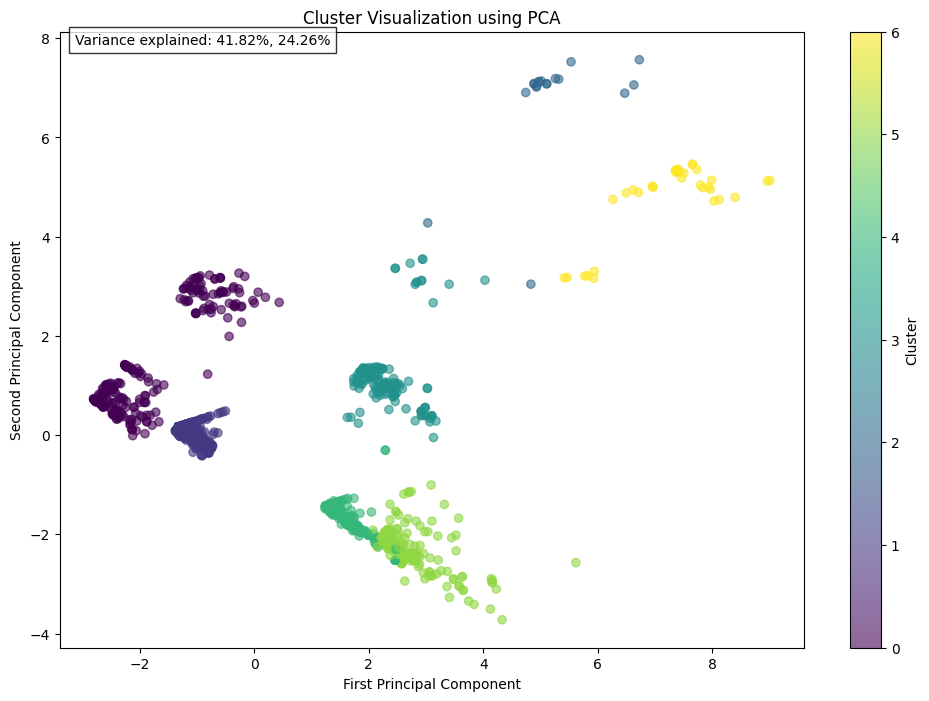

In [311]:
# Get the features used for clustering

from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], 
                     cmap='viridis', alpha=0.6)

# Add labels and title
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Cluster Visualization using PCA')

# Add a colorbar
plt.colorbar(scatter, label='Cluster')

# Add percentage of variance explained
var_explained = pca.explained_variance_ratio_
plt.text(0.02, 0.98, f'Variance explained: {var_explained[0]:.2%}, {var_explained[1]:.2%}',
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

# Save the plot
plt.plot()



TypeError: Axes3D.plot() missing 2 required positional arguments: 'xs' and 'ys'

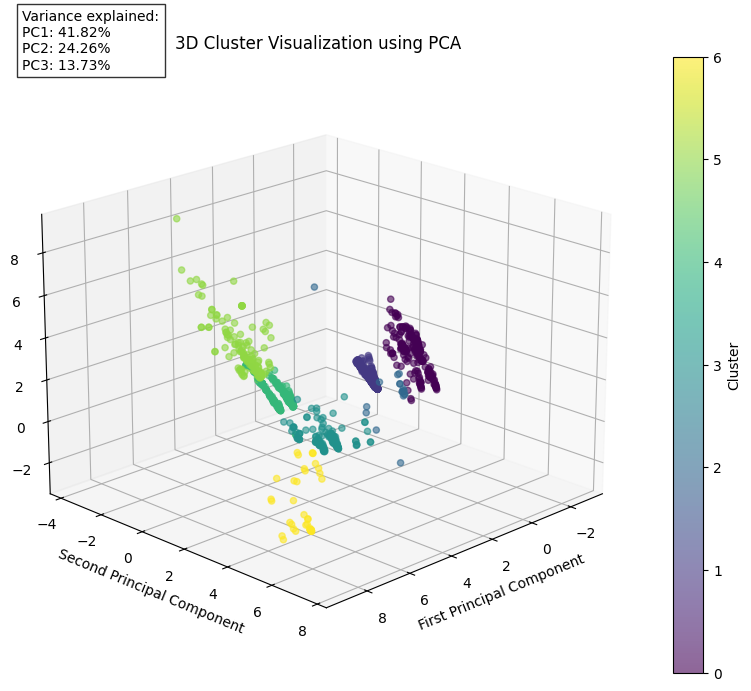

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA





# Apply PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df)



# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create the scatter plot
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                    c=df['Cluster'], cmap='viridis', alpha=0.6)

# Add labels and title
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
plt.title('3D Cluster Visualization using PCA')

# Add a colorbar
plt.colorbar(scatter, label='Cluster')

# Add percentage of variance explained
var_explained = pca.explained_variance_ratio_
info_text = f'Variance explained:\nPC1: {var_explained[0]:.2%}\nPC2: {var_explained[1]:.2%}\nPC3: {var_explained[2]:.2%}'
ax.text2D(0.02, 0.98, info_text, transform=ax.transAxes, 
          bbox=dict(facecolor='white', alpha=0.8))

# Adjust the viewing angle for better visualization
ax.view_init(elev=20, azim=45)

# Save the plot
plt.plot()



In [313]:
import seaborn as sns

# Get only the features we used for clustering
features = ['Select Printer', 'Printer Requested', 'Material 1 Qty', 'User Type', 
           'Material 1', 'Printed On', 'Print Time (Hours)', 'Material_Category1']

# Create loadings DataFrame with correct dimensions
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(3)],  # Only 3 PCs since we used n_components=3
    index=features
)

# Print the loadings
print("\nFeature Loadings for each Principal Component:")
print(loadings.round(3))

# Print explained variance ratio
print("\nExplained Variance Ratio:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.3%}")

# Create a heatmap of the loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='RdBu', center=0, fmt='.2f')
plt.title('Feature Loadings for Principal Components')
plt.tight_layout()
plt.savefig('pca_loadings_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()

# Print the top features for each PC
print("\nTop features for each Principal Component:")
for i in range(3):  # Show all 3 PCs
    pc_loadings = loadings[f'PC{i+1}'].abs().sort_values(ascending=False)
    print(f"\nPC{i+1} (explains {pca.explained_variance_ratio_[i]:.3%} of variance):")
    for feature, loading in pc_loadings.items():
        print(f"{feature}: {loading:.3f}")


Feature Loadings for each Principal Component:
                      PC1    PC2    PC3
Select Printer      0.310  0.483 -0.024
Printer Requested   0.204 -0.292  0.528
Material 1 Qty     -0.199  0.180  0.126
User Type           0.311  0.397 -0.211
Material 1          0.313  0.481 -0.032
Printed On          0.241  0.095  0.604
Print Time (Hours)  0.113 -0.256 -0.531
Material_Category1  0.746 -0.432 -0.115

Explained Variance Ratio:
PC1: 41.815%
PC2: 24.257%
PC3: 13.731%

Top features for each Principal Component:

PC1 (explains 41.815% of variance):
Material_Category1: 0.746
Material 1: 0.313
User Type: 0.311
Select Printer: 0.310
Printed On: 0.241
Printer Requested: 0.204
Material 1 Qty: 0.199
Print Time (Hours): 0.113

PC2 (explains 24.257% of variance):
Select Printer: 0.483
Material 1: 0.481
Material_Category1: 0.432
User Type: 0.397
Printer Requested: 0.292
Print Time (Hours): 0.256
Material 1 Qty: 0.180
Printed On: 0.095

PC3 (explains 13.731% of variance):
Printed On: 0.604
Print